In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [14]:
# Step 1: Load the processed data
file_path = '../data/final_team_cluster_data.csv'
final_team_cluster_data = pd.read_csv(file_path)

In [15]:
# Step 2: Prepare data for clustering
# Drop the team name column to use only features
team_names = final_team_cluster_data['event_team']
clustering_features = final_team_cluster_data.drop(columns=['event_team'])

In [16]:
# Step 3: Apply OPTICS Clustering
# Configure OPTICS with key parameters
optics_model = OPTICS(min_samples=5, metric='euclidean', cluster_method='xi', xi=0.05, min_cluster_size=0.05)
optics_model.fit(clustering_features)

OPTICS(metric='euclidean', min_cluster_size=0.05)

In [17]:
# Extract cluster labels
final_team_cluster_data['cluster'] = optics_model.labels_

In [18]:
# Step 4: Visualize Clustering Results
# Use PCA to reduce dimensionality for visualization (2D plot)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(clustering_features)

In [19]:
# Add PCA components to the DataFrame
final_team_cluster_data['pca_x'] = pca_features[:, 0]
final_team_cluster_data['pca_y'] = pca_features[:, 1]

Text(0, 0.5, 'PCA Component 2')

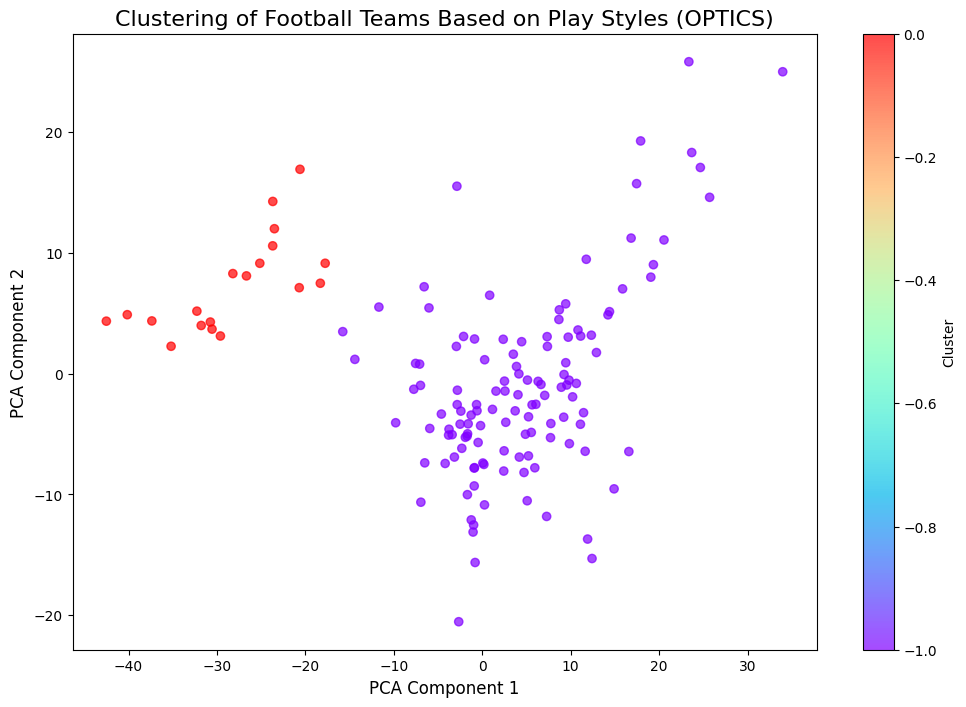

In [20]:
# Plot the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    final_team_cluster_data['pca_x'], 
    final_team_cluster_data['pca_y'], 
    c=final_team_cluster_data['cluster'], 
    cmap='rainbow', 
    alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering of Football Teams Based on Play Styles (OPTICS)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

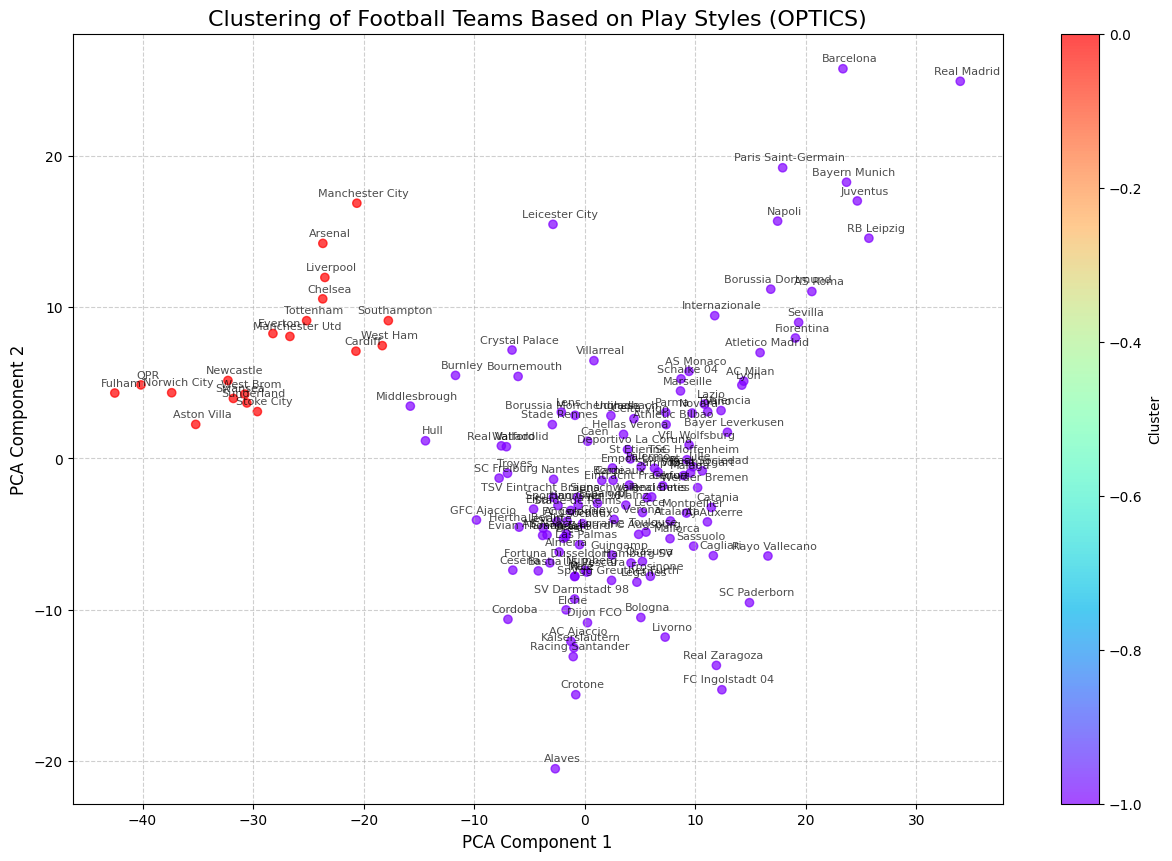

In [21]:
# Set up the plot
plt.figure(figsize=(15, 10))  # Increase figure size for better clarity

# Scatter plot of clusters
scatter = plt.scatter(
    final_team_cluster_data['pca_x'], 
    final_team_cluster_data['pca_y'], 
    c=final_team_cluster_data['cluster'], 
    cmap='rainbow', 
    alpha=0.7
)

# Annotate team names in the plot
for i, team in enumerate(team_names):
    plt.annotate(
        team,
        (final_team_cluster_data['pca_x'][i], final_team_cluster_data['pca_y'][i]),
        fontsize=8,
        alpha=0.7,
        textcoords="offset points",  # Offset the text slightly
        xytext=(5, 5),  # Offset by (x=5, y=5) points
        ha='center'  # Center the annotation
    )

# Add grid, labels, and title
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Clustering of Football Teams Based on Play Styles (OPTICS)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.show()